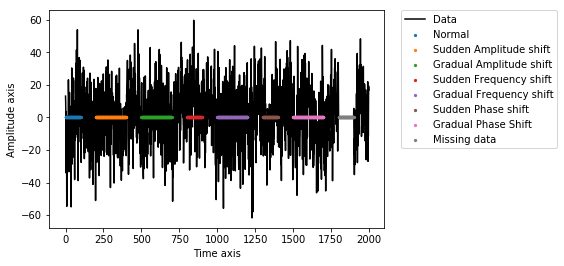

134.7691498359458

In [1]:
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from datetime import timedelta 
import pandas as pd

def get_data(n="n"):
    N=10000
    A_base = 20
    T_week = (2*np.pi)/ 168  # weekly period in hours
    T_day = (2*np.pi) / 24   # daily period in hours
    time_step = 1
    x_range = np.arange(0,N,time_step)
    data = (A_base/2)*np.sin(T_day*x_range) +(A_base/2)*np.sin(T_week*x_range) 

    # Training set contains "good" data
    Start = 8000

    # Sudden amplitude shift *for both weekly and daily sines
    A = 5                           # amplitude shift
    A_loc = 8200                     # location
    A_dur = 200                      # anomaly duration
    A_range = np.arange(A_loc,A_loc+A_dur) 
    data[A_range] = (A/2)*np.sin(T_day*A_range) +(A/2)*np.sin(T_week*A_range) 

    # Gradual amplitude shift *for both weekly and daily sines
    As = 5                           # amplitude shift
    As_loc = 8500                     # location
    As_dur = 200                      # anomaly duration
    As_range = np.arange(As_loc,As_loc+As_dur,1)
    As_shift = np.linspace(A_base,As,As_dur)
    data[As_range] = (As_shift/2)*np.sin(T_day*As_range) +(As_shift/2)*np.sin(T_week*As_range) 

    # Sudden Frequency shift *for both weekly and daily sines
    f = 2                          # frequency shift
    f_loc = 8800                   # location
    f_dur = 100                    # anomaly duration
    f_range = np.arange(f_loc,f_loc+f_dur)
    data[f_range] = (A_base/2)*np.sin((T_day*f_range)/f) +(A_base/2)*np.sin((T_week*f_range)/f) 

    # Gradual frequency shift
    fs = 1.4                           # frequency shift
    fs_loc = 9000                     # location
    fs_dur = 200                      # anomaly duration
    fs_range =  np.arange(fs_loc,fs_loc+fs_dur)
    fs_shift =  np.arange(1,fs,((fs-1)/fs_dur))
    data[fs_range] = (A_base/2)*np.sin((T_day*fs_range)/fs_shift) +(A_base/2)*np.sin((T_week*fs_range)/fs_shift)
        
    # Sudden Phase Shift
    p = 0.5*np.pi
    p_loc = 9300
    p_dur = 100
    p_range = np.arange(p_loc,p_loc+p_dur)
    data[p_range] =  (A_base/2)*np.sin(T_day*p_range + p) +(A_base/2)*np.sin(T_week*p_range + p) 

    # Gradual Phase Shift
    ps = 0.5*np.pi
    ps_loc = 9500
    ps_dur = 200
    ps_range = np.arange(ps_loc,ps_loc+ps_dur)
    ps_shift =  np.linspace(1,ps,ps_dur)
    data[ps_range] = (A_base/2)*np.sin(T_day*ps_range + ps_shift) +(A_base/2)*np.sin(T_week*ps_range + ps_shift) 


    # Add noise
    if n == "Y":
        N_s = 15                    # noise magnitude
        data = data + np.random.normal(0,N_s,N)

    # Missing data
    M_loc = 9800                        # location
    M_dur = 100                        # anomaly duration
    data[M_loc:M_loc+M_dur] = 0

    # Convert data indicies into hours '%m/%d/%y %H:%M'
    data_start = "01/03/2017 00:00"
    dates = []
    for hour in range(N):
        dates.append(datetime.strptime(data_start, '%m/%d/%Y %H:%M') + timedelta(hours=hour)) 
    
    # Output the anomaly locations and durations (for plotting later)
    anomaly_loc = [A_loc, As_loc, f_loc, fs_loc, p_loc, ps_loc, M_loc]
    anomaly_dur = [A_dur, As_dur, f_dur, fs_dur, p_dur, ps_dur, M_dur]
    
    data_pd = pd.DataFrame(data=np.array((dates, list(data))).T,
                       index=range(len(dates)),
                       columns=['timestamp','consumption'])
    data_pd.to_csv(path_or_buf="/home/codepan1/RestRunnerCode/sim_data.csv" ,columns=['timestamp','consumption'])
    
    return data, anomaly_loc, anomaly_dur, dates


def plot_data(data, anomaly_loc, anomaly_dur, Start=8000):
    
    # Arrays for plotting
    anomaly_range = []
    for i in range(np.size(anomaly_loc)):
        anomaly_range.append(np.arange(anomaly_loc[i],anomaly_loc[i]+anomaly_dur[i]))

    
    plt.plot(data, label = 'Data',c='k', zorder=0)
    plt.scatter(range(100),np.zeros(100) ,s=5, label = 'Normal' ,zorder=10)

    plt.scatter(anomaly_range[0] -Start, np.zeros_like(anomaly_range[0]),s=5, label = 'Sudden Amplitude shift' ,zorder=10)
    plt.scatter(anomaly_range[1] -Start, np.zeros_like(anomaly_range[1]),s=5, label = 'Gradual Amplitude shift', zorder=10)
    plt.scatter(anomaly_range[2] -Start, np.zeros_like(anomaly_range[2]),s=5, label = 'Sudden Frequency shift', zorder=10)
    plt.scatter(anomaly_range[3] -Start, np.zeros_like(anomaly_range[3]),s=5, label = 'Gradual Frequency shift', zorder=10)
    plt.scatter(anomaly_range[4] -Start, np.zeros_like(anomaly_range[4]),s=5, label = 'Sudden Phase shift', zorder=10)
    plt.scatter(anomaly_range[5] -Start, np.zeros_like(anomaly_range[5]),s=5, label = 'Gradual Phase Shift', zorder=10)
    plt.scatter(anomaly_range[6] -Start, np.zeros_like(anomaly_range[6]),s=5, label = 'Missing data', zorder=10)

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel("Time axis")
    plt.ylabel("Amplitude axis")
    plt.show()
    

data, anomaly_loc, anomaly_dur, dates = get_data(n="Y")
plot_data(data[8000:], anomaly_loc, anomaly_dur)